In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [62]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [64]:
trest_mean = df['trestbps'].mean()
chol_mean = df['chol'].mean()
thalch_mean = df['thalch'].mean()
oldpeak_mean = df['oldpeak'].mean()
ca_mean = df['ca'].mean()
  
df['trestbps'].fillna(value=trest_mean, inplace=True)
df['chol'].fillna(value=chol_mean, inplace=True)
df['thalch'].fillna(value=thalch_mean, inplace=True)
df['oldpeak'].fillna(value=oldpeak_mean, inplace=True)
df['ca'].fillna(value=ca_mean, inplace=True)

In [66]:
df.dropna(subset=['fbs', 'restecg', 'exang'], inplace=True)

In [68]:
df = df.drop('thal', axis=1)

In [72]:
df['slope'] = df['slope'].fillna('flat')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        774 non-null    int64  
 1   age       774 non-null    int64  
 2   sex       774 non-null    object 
 3   dataset   774 non-null    object 
 4   cp        774 non-null    object 
 5   trestbps  774 non-null    float64
 6   chol      774 non-null    float64
 7   fbs       774 non-null    object 
 8   restecg   774 non-null    object 
 9   thalch    774 non-null    float64
 10  exang     774 non-null    object 
 11  oldpeak   774 non-null    float64
 12  slope     774 non-null    object 
 13  ca        774 non-null    float64
 14  num       774 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 96.8+ KB


Above I have gone through the data and for some of the columns I have filled the null values with the Mean of that column, one column I dropped because more than half of the rows were null. Lastly for the column slope I filled the null values with the value 'flat'. I did this after seeing flat was the most used value in that column.

**Model Training and Model Evaluation**

In [87]:
X = df.drop(['cp', 'id'], axis=1)

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Scale the data to improve model performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Target column
y = df['cp']

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model with increased iterations and alternative solvers
model = LogisticRegression(max_iter=5000, solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.6064516129032258
Classification Report:
                 precision    recall  f1-score   support

   asymptomatic       0.74      0.88      0.81        83
atypical angina       0.43      0.52      0.47        29
    non-anginal       0.29      0.18      0.22        33
 typical angina       0.00      0.00      0.00        10

       accuracy                           0.61       155
      macro avg       0.36      0.39      0.37       155
   weighted avg       0.54      0.61      0.57       155



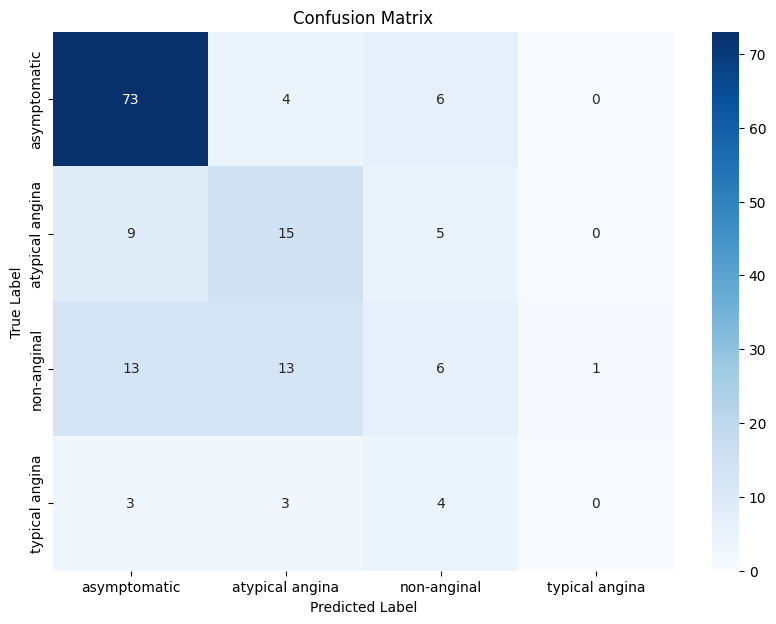

In [93]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()